In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r"C:\Users\91822\OneDrive\Documents\Capstone5-Copper MOdeling\Copper_Set.xlsx - Result 1.csv",low_memory=False)
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
# verify the number of unique values in each features

for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [9]:
# convert the data type from object to numeric

df['item_date']=pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce')
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [10]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [11]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [12]:
# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.

df.drop(columns=['id','material_ref'], inplace=True)

In [13]:
df.isnull().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [14]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,181670,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,2020-11-26 22:56:58.127374080,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,2020-09-29 00:00:00,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,2020-11-30 00:00:00,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,2021-02-03 00:00:00,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08
std,NaN,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05


In [15]:
# quantity and selling price values are below 0. so we convert to null for below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181668.0,5875.066247,0.00001,10.971217,30.365013,67.161335,1000000000.0,2349107.102735
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
selling_price,181665.0,1918.124252,0.1,669.0,812.0,953.0,100001015.0,331802.034663


In [16]:
df.isnull().sum()

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [19]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [20]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [21]:
# convert categorical data into numerical data - using map and ordinal encoder methods

df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type']=df['item type'].map({'W':1,'WI':2,'S':3,'Others':4,'PL':5,'IPL':6,'SLAWR':7})

In [22]:
df['item type'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [23]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181622,2020-11-26 23:02:12.050081792,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181622.0,5876.531676,0.00001,10.968784,30.364016,67.162076,1000000000.0,2349404.566764
customer,181622.0,30232507.561199,12458.0,30196884.0,30205242.0,30280416.0,30408185.0,100564.617021
country,181622.0,44.893818,25.0,26.0,30.0,78.0,113.0,24.404481
status,181622.0,1.316564,0.0,1.0,1.0,1.0,8.0,1.330333
item type,181622.0,1.900392,1.0,1.0,1.0,3.0,7.0,1.117543
application,181622.0,25.615669,2.0,10.0,15.0,41.0,99.0,17.753967
thickness,181622.0,2.550493,0.18,0.7,1.5,3.0,400.0,2.976505
width,181622.0,1295.266003,1.0,1179.0,1250.0,1500.0,2990.0,261.65154
product_ref,181622.0,474015230.216747,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717533572.155176


Skewness Handling - Feature Scaling (Log Transformation)

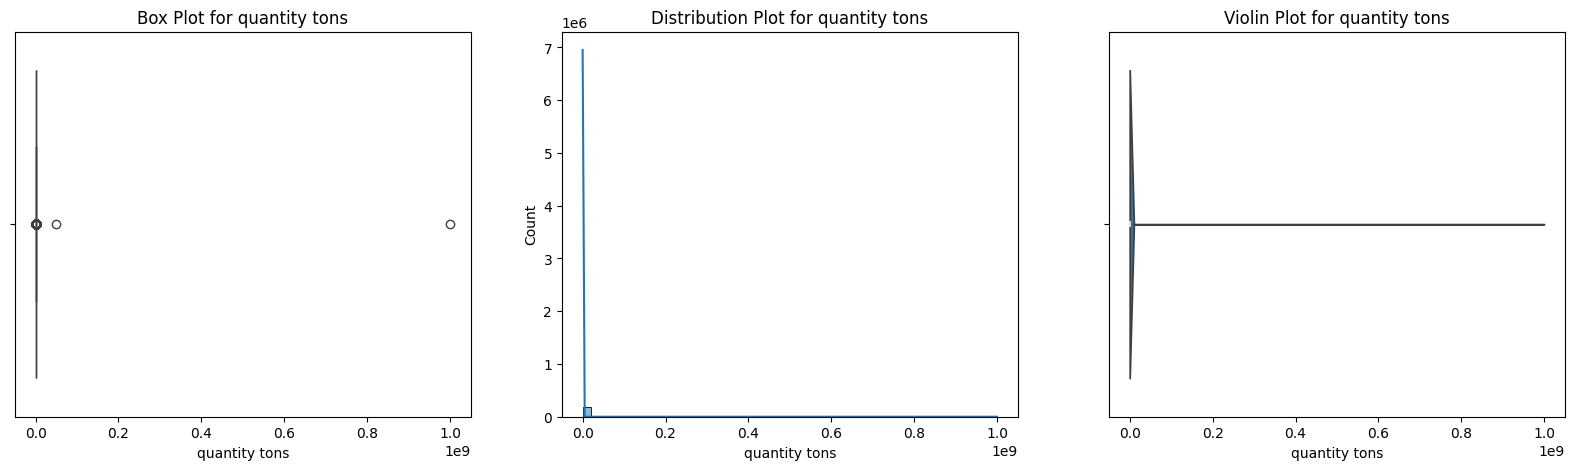

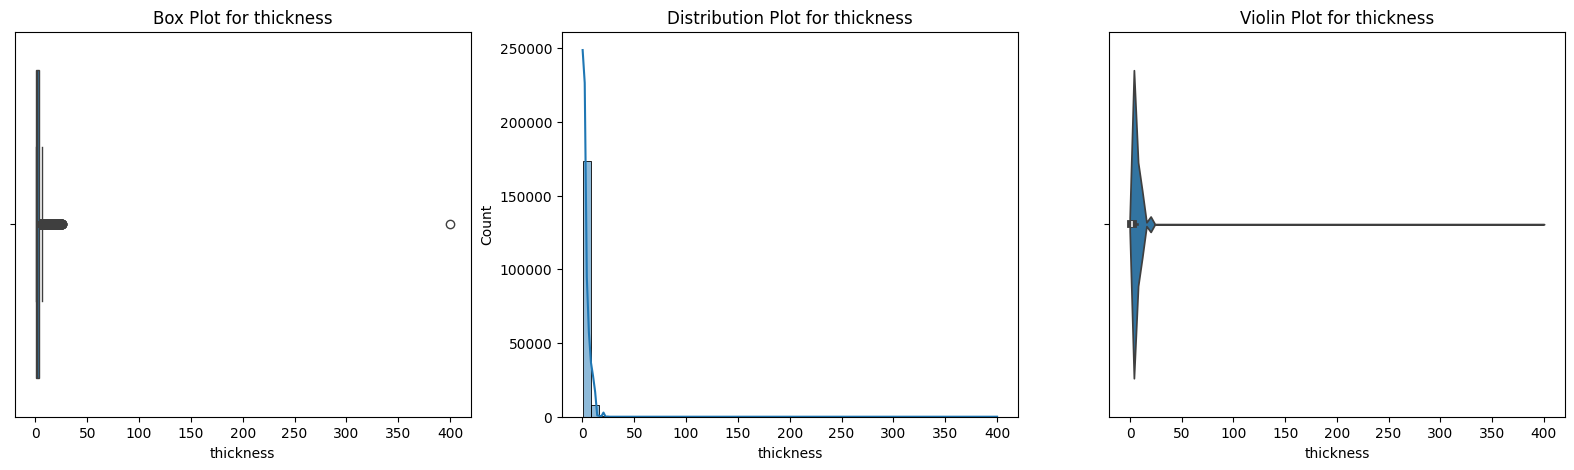

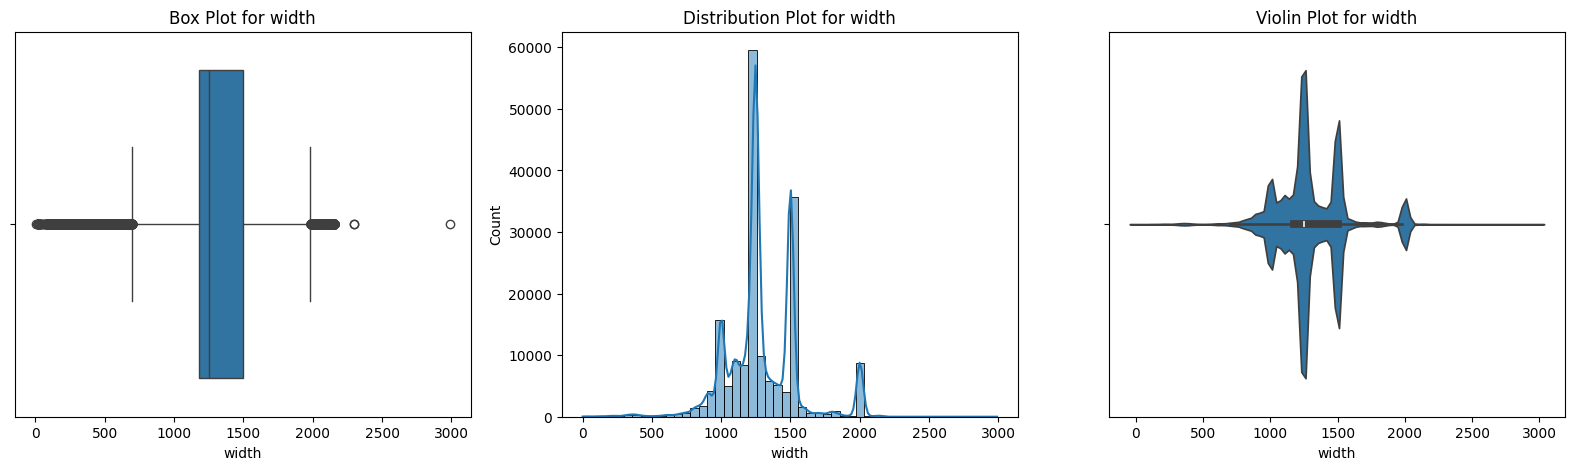

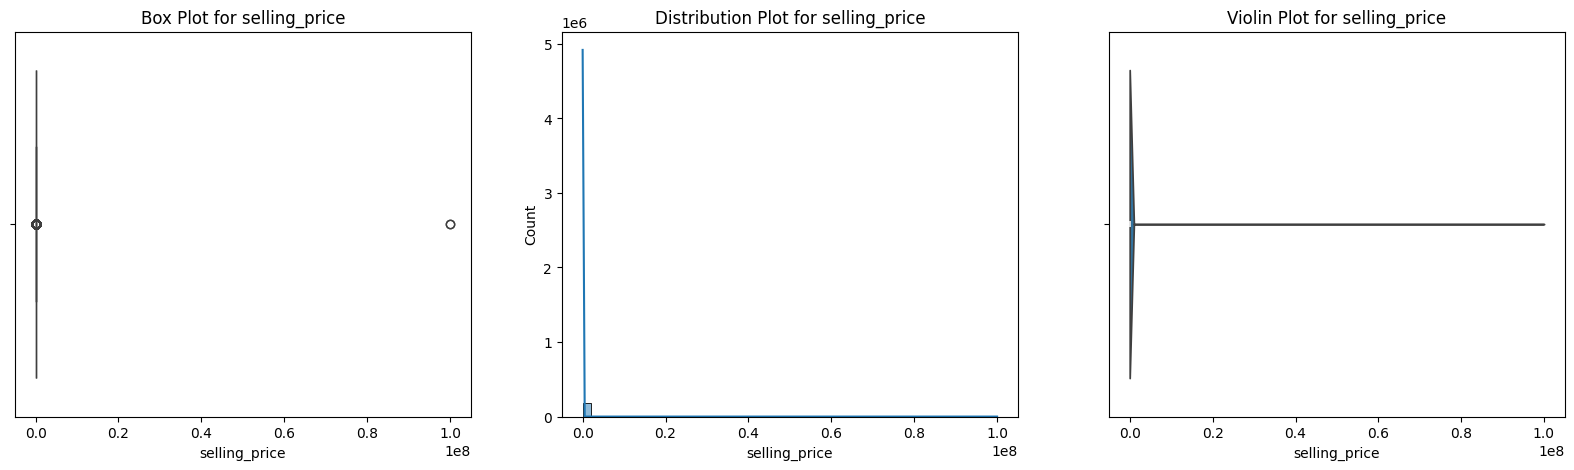

In [24]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()


for i in ['quantity tons','thickness', 'width', 'selling_price']:
    plot(df, i)

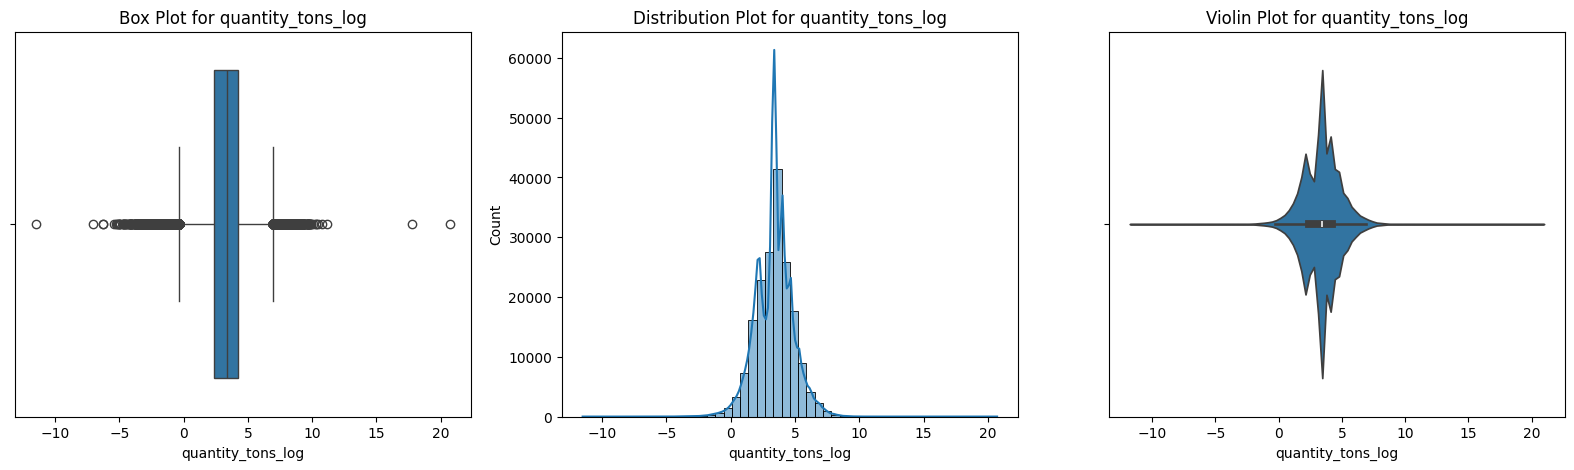

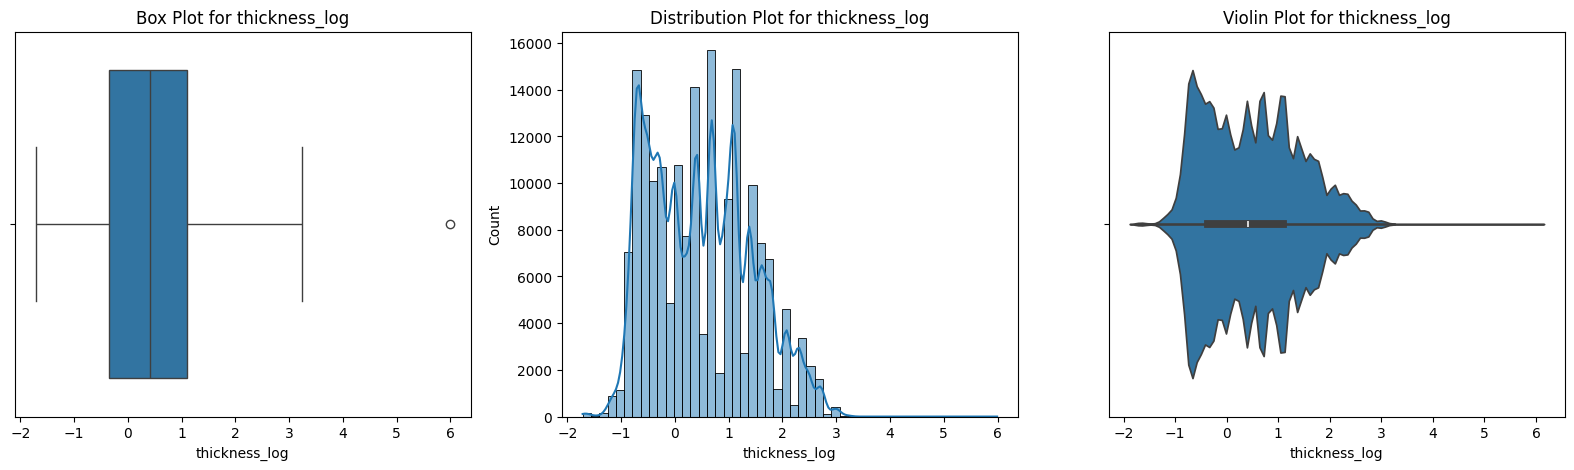

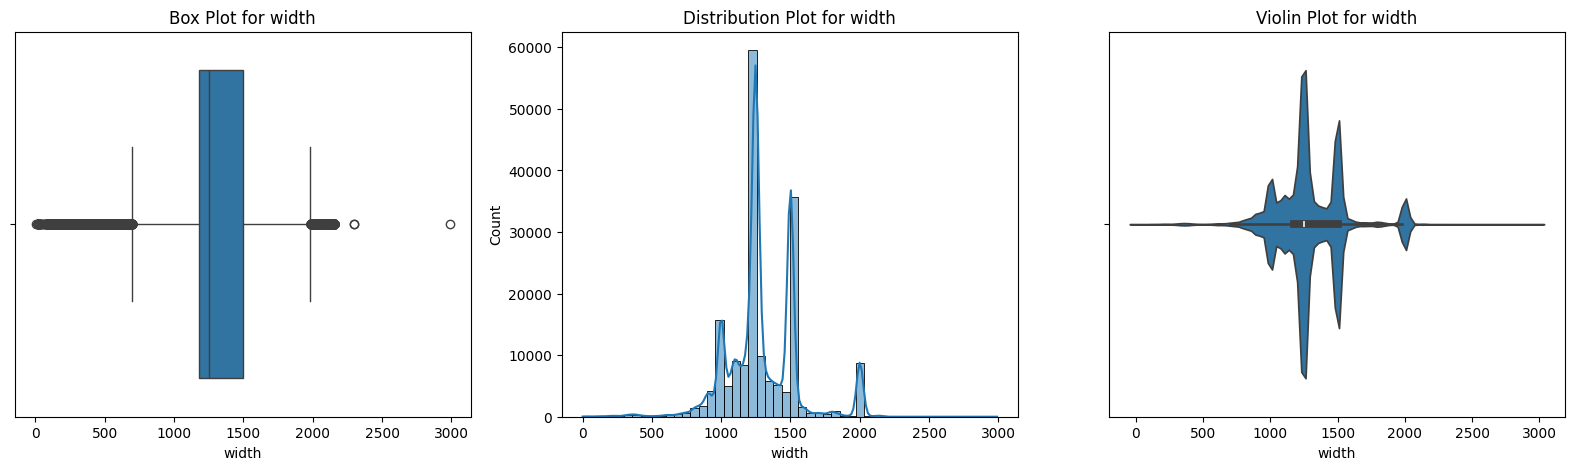

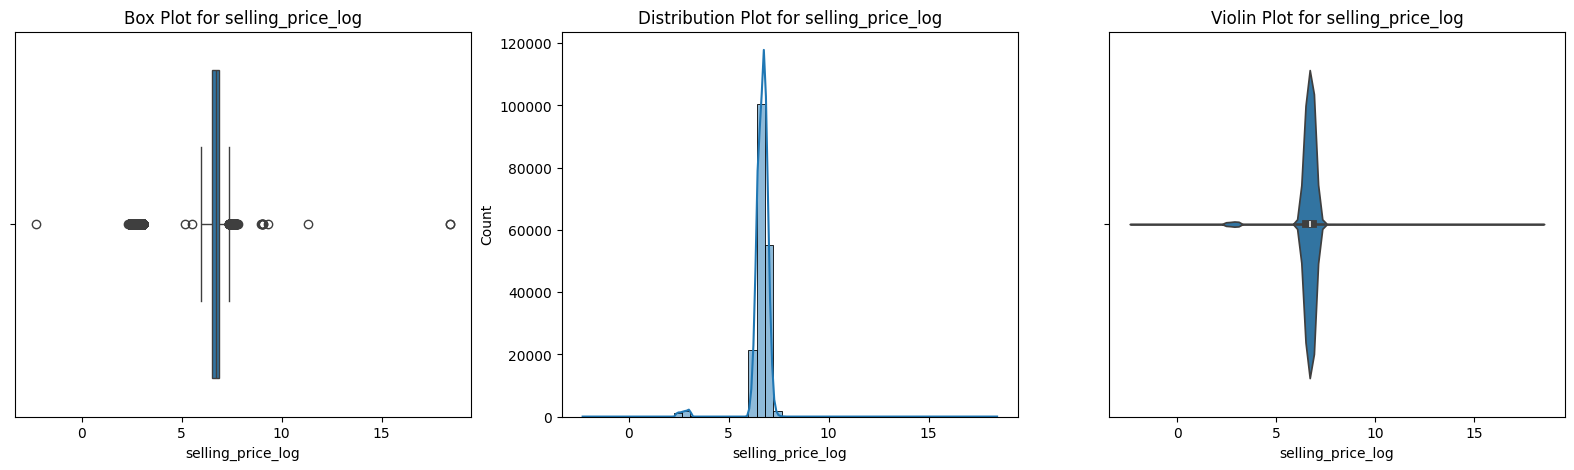

In [25]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

df1 = df.copy()
df1['quantity_tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])

# after log transformation the data are normally distributed and reduced the skewness. [box plot,hist plot and violin plot]
for i in ['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

Outliers Handling - Interquartile Range (IQR) method

In [26]:
df2 = df1.copy()

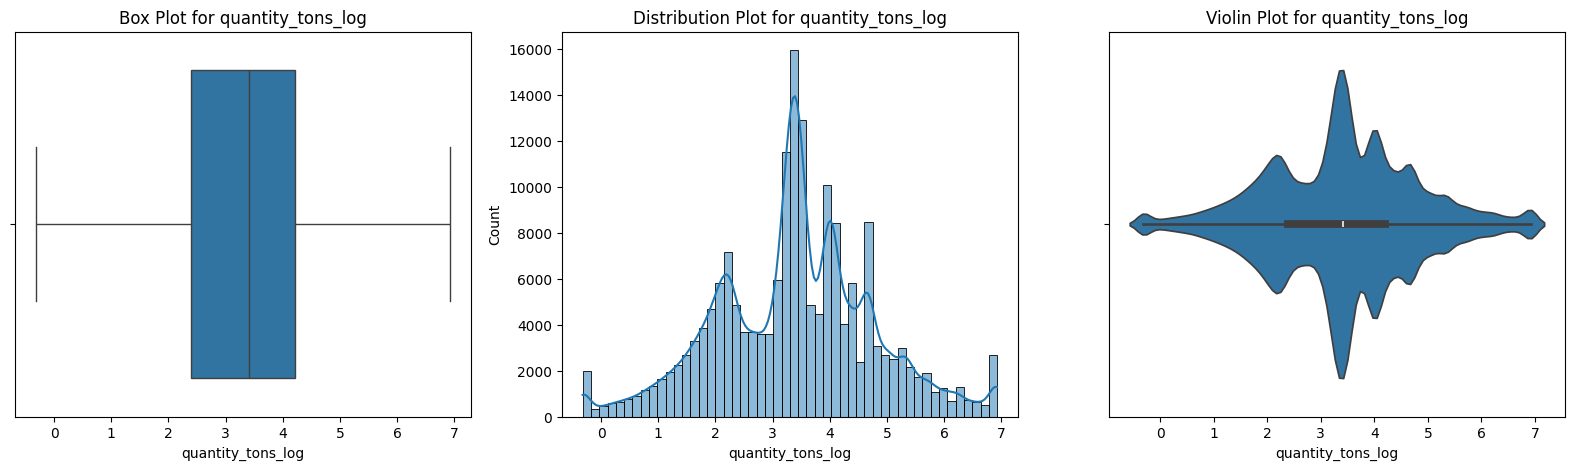

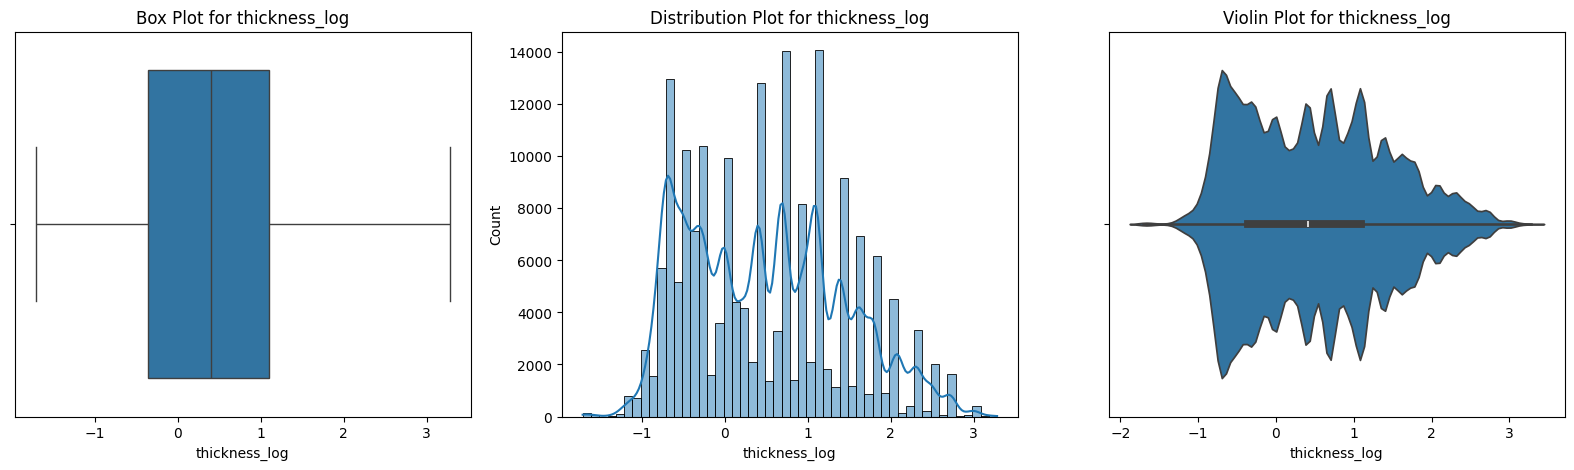

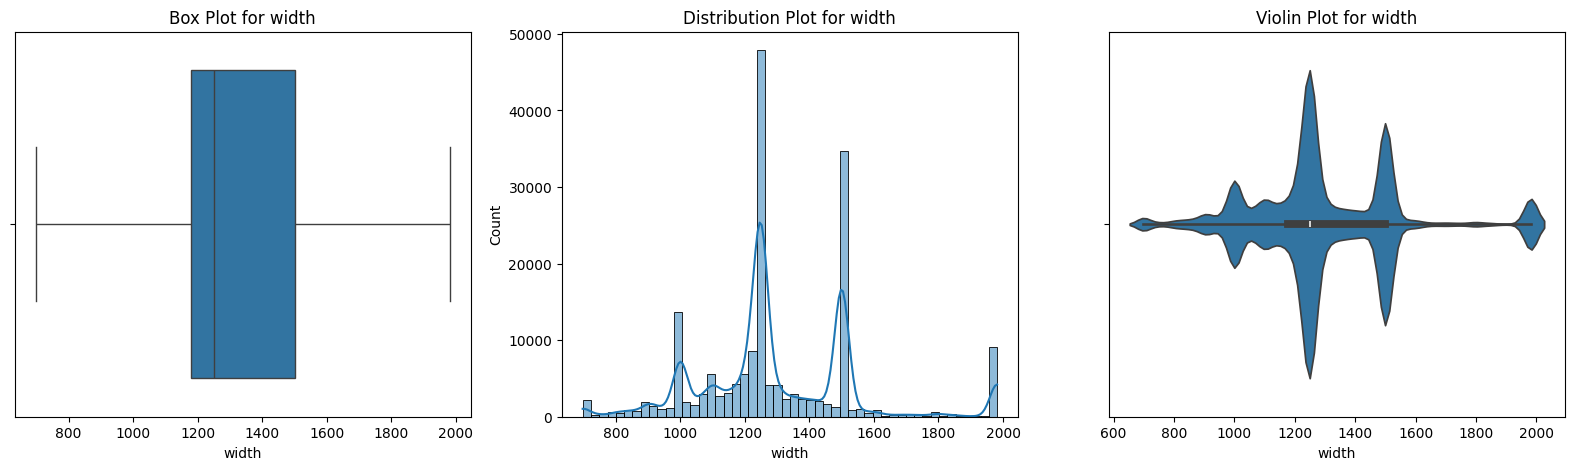

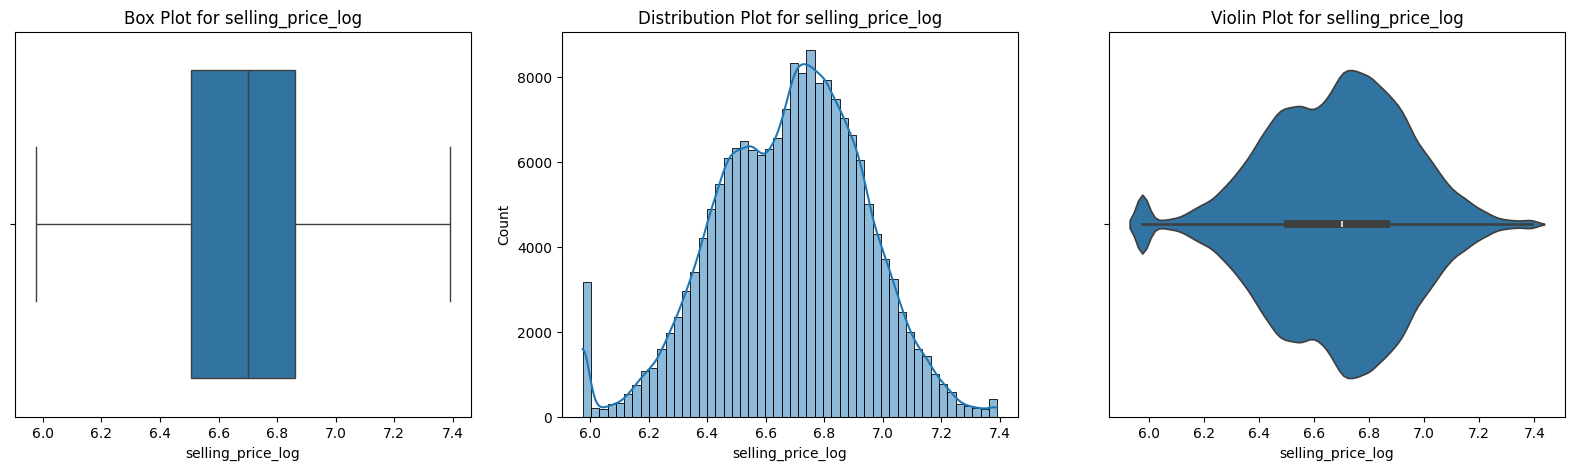

In [27]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
outlier(df2, 'quantity_tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')

for i in ['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)

In [28]:
# after add the new column of 'quantity tons_log', 'thickness_log', 'selling_price_log', drop the existing columns
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])

<Axes: >

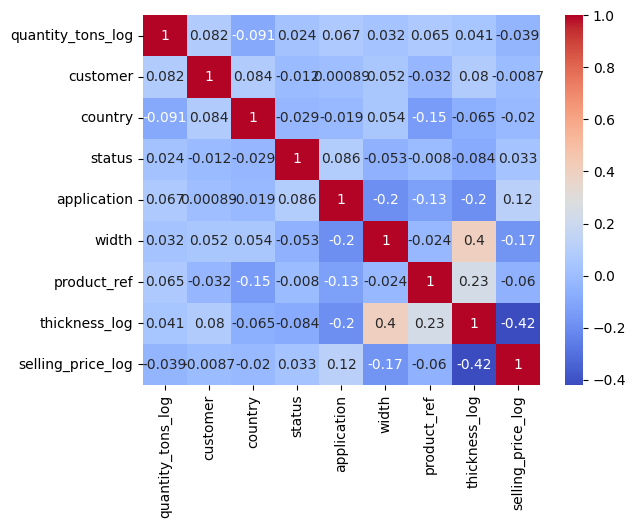

In [29]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['quantity_tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df3[col].corr()
sns.heatmap(df_heatmap, annot=True, cmap='coolwarm')

In [30]:
# The highest value is (0.4 or -0.42) only,
# So there is no columns are highly correlated and no need to drop any columns.    

Classifiaction Model - Logistic Regression, Random Forest, XGB Regression, DecisionTreeClassifier

In [31]:
df3['status'].value_counts()

status
1    115997
0     34431
4     19566
6      4276
3      4168
2      3120
7        53
8        10
5         1
Name: count, dtype: int64

In [32]:
won=df3[df3['status']==1]
lost=df3[df3['status']==0]


In [33]:
print(won.shape)
print(lost.shape)

(115997, 12)
(34431, 12)


In [34]:
# Data is unbalance so dealing with Under Sampling

In [35]:
won_sample=won.sample(n=34431)

In [36]:
class_data=pd.concat([won_sample,lost],axis=0)

In [37]:
class_data['status'].value_counts()

status
1    34431
0    34431
Name: count, dtype: int64

In [38]:
class_data.drop(columns=['item_date','delivery date'],inplace=True)

In [39]:
x=class_data.drop(columns=['status'],axis=1)
y=class_data['status']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2,stratify=y)

In [42]:
model=LogisticRegression()
model.fit(x_train,y_train) #training
y_pred=model.predict(x_test) #testing
res=classification_report(y_test,y_pred)

print(res)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",result)
print("F1 Score: ",f1_score(y_test,y_pred) )


              precision    recall  f1-score   support

           0       0.57      0.34      0.43      8608
           1       0.53      0.74      0.62      8608

    accuracy                           0.54     17216
   macro avg       0.55      0.54      0.52     17216
weighted avg       0.55      0.54      0.52     17216

Confusion Matrix: 
 [[2934 5674]
 [2199 6409]]
F1 Score:  0.6194963994007057


In [43]:
model=RandomForestClassifier()
model.fit(x_train,y_train) #training
y_pred=model.predict(x_test) #testing
res=classification_report(y_test,y_pred)
print(res)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",result)
print("F1 Score: ",f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      8608
           1       0.94      0.89      0.91      8608

    accuracy                           0.92     17216
   macro avg       0.92      0.92      0.92     17216
weighted avg       0.92      0.92      0.92     17216

Confusion Matrix: 
 [[8135  473]
 [ 982 7626]]
F1 Score:  0.9129107559705513


In [44]:
import xgboost as xgb

model=xgb.XGBClassifier()
model.fit(x_train,y_train) #training
y_pred=model.predict(x_test) #testing
res=classification_report(y_test,y_pred)
print(res)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",result)
print("F1 Score: ",f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8608
           1       0.91      0.85      0.88      8608

    accuracy                           0.88     17216
   macro avg       0.88      0.88      0.88     17216
weighted avg       0.88      0.88      0.88     17216

Confusion Matrix: 
 [[7919  689]
 [1330 7278]]
F1 Score:  0.8781900452488688


For Classification Model, RandomForest Classifier Performs well with 91% accuracy

In [46]:
rf1=RandomForestClassifier()
rf1.fit(x,y)

RandomForestClassifier()

In [47]:
import joblib
joblib.dump(rf1,"Classifier_Model")

['Classifier_Model']

In [48]:
class_data.tail(1)

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log
181535,30198408.0,25.0,0,3,10.0,1146.0,1668701718,4.664121,0.336472,6.588926


In [49]:
classifier_model = joblib.load('Classifier_Model')

# Define the input data as a 1D array
input_data = np.array([30198408.0, 25.0, 3, 10.0, 1146.0, 1668701718, 4.664121, 0.336472, 6.588926])

# Reshape the input data into a 2D array
input_data_2d = input_data.reshape(1, -1)  # Reshape to a single row
predictions = classifier_model.predict(input_data_2d)
if predictions == 1:
    print("Won")
else:
    print("Lost")

Lost


In [50]:
class_data.head(1)

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log
31,30152417.0,78.0,1,3,28.0,1132.0,628377,4.629099,0.039221,6.770308


In [51]:
classifier_model = joblib.load('Classifier_Model')

# Define the input data as a 1D array
input_data = np.array([30330352.0, 78.0, 1, 10.0, 1000.0, 640665, 3.633352, 1.386294, 6.52503])

# Reshape the input data into a 2D array
input_data_2d = input_data.reshape(1, -1)  # Reshape to a single row
predictions = classifier_model.predict(input_data_2d)
if predictions == 1:
    print("Won")
else:
    print("Lost")


Won


In [ ]:
# Saving the model
import pickle
with open('Classification_Model.pkl', 'wb') as file:
    pickle.dump(rf1, file)